# Applying Models

## Imports

In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as DT
import time
from tqdm import tqdm

In [0]:
import math

## Loading Data

In [0]:
data_dir = "/content/gdrive/My Drive/Hackathon - II/data/"

In [0]:
data = pd.read_csv(os.path.join(data_dir, "dataset.csv"))

In [0]:
data = data.drop("Unnamed: 0", axis=1)

In [0]:
data['Category_2']=data['Category_2'].fillna(data['Category_2'].mode()[0])


## Train Test split

In [0]:
data = data.sort_values("Datetime")

In [44]:
data.head()

,Item_ID,Datetime,Category_3,Category_2,Category_1,Price,Number_Of_Sales
0,29654,2014-01-01,1,2.0,184,0.000,0.0
267834,29992,2014-01-01,0,3.0,181,0.000,0.0
1125085,31045,2014-01-01,0,1.0,234,0.000,0.0
98388,29781,2014-01-01,1,2.0,12,0.000,0.0
1294531,31254,2014-01-01,0,2.0,54,0.347,42.0


In [0]:
data["Datetime"] = pd.to_datetime(data["Datetime"])

In [0]:
data_train = data[(data['Datetime'] < '2016-01-01')]

In [0]:
# data_train["Datetime"] = pd.to_datetime(data_train["Datetime"])

In [0]:
data_test = data[(data['Datetime'] > '2015-12-31')]

In [0]:
test_og = data_test[(data_test["Price"]!=0)&((data_test["Number_Of_Sales"]!=0))]

In [0]:
ids = list(set(data.Item_ID))

## Models

#### Simple Moving Avg

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
price_rmses = []
volume_rmses = []

In [0]:

for win in tqdm([2, 3, 4, 7, 14]):
  final_predictions = pd.DataFrame()
  for idd in ids:
    train = data_train[data_train["Item_ID"] == idd]
    test = data_test[data_test["Item_ID"] == idd]
    da_ta = pd.concat([train, test])
    ma= da_ta.copy()
    ma[["Price", "Number_Of_Sales"]] = da_ta[["Price", "Number_Of_Sales"]].rolling(window=win).mean()
    y_pred = ma[ma.Datetime > "2015-12-31"]
    test[["Price", "Number_Of_Sales"]] = y_pred[["Price", "Number_Of_Sales"]].values
    tes_og = test_og.copy()
    tes_og = tes_og[tes_og["Item_ID"] == idd]
    final_test = tes_og.merge(test[["Datetime", "Price", "Number_Of_Sales"]], on="Datetime", how = "left")
    if final_test.empty:
      final_predictions = final_test
    else:
      final_predictions = pd.concat([final_predictions, final_test])
#     p = math.pow(mean_squared_error(final_test["Price_x"].values, final_test["Price_y"].values),0.5)
#     print(id,"price rmse :",p)
#     price_rmses.append((id,p))
#     v = math.pow(mean_squared_error(final_test["Number_Of_Sales_x"].values, final_test["Number_Of_Sales_y"].values),0.5)
#     print(id,"volume rmse :",v)
#     volume_rmses.append((id,v))
  price_rmse = math.pow(mean_squared_error(final_predictions["Price_x"].values, final_predictions["Price_y"].values),0.5)
  volume_rmse = math.pow(mean_squared_error(final_predictions["Number_Of_Sales_x"].values, final_predictions["Number_Of_Sales_y"].values),0.5)
  print("\n")
  print("***********")
  print("window_size = ",win)
  print("Price RMSE = ",price_rmse)
  print("Volume RMSE = ",volume_rmse)
  print("***********")
  print("\n")

    

 20%|██        | 1/5 [03:40<14:40, 220.09s/it]



***********
window_size =  2
Price RMSE =  2.646205297721118
Volume RMSE =  628.9777788718911
***********




In [21]:

for alp in [0.1,0.2,0.8,0.9]:
  final_predictions = pd.DataFrame()
  for id in ids:
    train = data_train[data_train["Item_ID"] == id]
    test = data_test[data_test["Item_ID"] == id]
    da_ta = pd.concat([train, test])
    ma= da_ta.copy()
    ma[["Price", "Number_Of_Sales"]] = da_ta[["Price", "Number_Of_Sales"]].ewm(alpha= alp, min_periods = 4).mean()
    y_pred = ma[ma.Datetime > "2015-12-31"]
    test[["Price", "Number_Of_Sales"]] = y_pred[["Price", "Number_Of_Sales"]].values
    tes_og = test_og.copy()
    tes_og = tes_og[tes_og["Item_ID"] == id]
    final_test = tes_og.merge(test[["Datetime", "Price", "Number_Of_Sales"]], on="Datetime", how = "left")
    if final_test.empty:
      final_predictions = final_test
    else:
      final_predictions = pd.concat([final_predictions, final_test])
    p = math.pow(mean_squared_error(final_test["Price_x"].values, final_test["Price_y"].values),0.5)
#     print(id,"price rmse :",p)
    price_rmses.append((id,p))
    v = math.pow(mean_squared_error(final_test["Number_Of_Sales_x"].values, final_test["Number_Of_Sales_y"].values),0.5)
#     print(id,"volume rmse :",v)
    volume_rmses.append((id,v))
  price_rmse = math.pow(mean_squared_error(final_predictions["Price_x"].values, final_predictions["Price_y"].values),0.5)
  volume_rmse = math.pow(mean_squared_error(final_predictions["Number_Of_Sales_x"].values, final_predictions["Number_Of_Sales_y"].values),0.5)
  print("\n")
  print("***********")
  print("alpha = ",alp)
  print("Price RMSE = ",price_rmse)
  print("Volume RMSE = ",volume_rmse)
  print("***********")
  print("\n")


 33%|███▎      | 1/3 [03:54<07:48, 234.27s/it]



***********
alpha =  0.1
Price RMSE =  3.450734152552442
Volume RMSE =  1366.4101167414603
***********




 67%|██████▋   | 2/3 [07:51<03:55, 235.11s/it]



***********
alpha =  0.2
Price RMSE =  3.1200336077713007
Volume RMSE =  1103.8372422412021
***********




100%|██████████| 3/3 [11:53<00:00, 237.37s/it]



***********
alpha =  0.8
Price RMSE =  0.96401997395762
Volume RMSE =  250.57407189939264
***********




# BEST MODEL

In [0]:
exma_metrics = []

In [29]:

for win in tqdm([2,3,4,5]):
  for alp in [0.8, 0.9]:
    final_predictions = pd.DataFrame()
    for idd in ids:
      train = data_train[data_train["Item_ID"] == idd]
      test = data_test[data_test["Item_ID"] == idd]
      da_ta = pd.concat([train, test])
      ma= da_ta.copy()
      ma[["Price", "Number_Of_Sales"]] = da_ta[["Price", "Number_Of_Sales"]].ewm(alpha= alp, min_periods = win).mean()
      y_pred = ma[ma.Datetime > "2015-12-31"]
      test[["Price", "Number_Of_Sales"]] = y_pred[["Price", "Number_Of_Sales"]].values
      tes_og = test_og.copy()
      tes_og = tes_og[tes_og["Item_ID"] == idd]
      final_test = tes_og.merge(test[["Datetime", "Price", "Number_Of_Sales"]], on="Datetime", how = "left")
      if final_test.empty:
        final_predictions = final_test
      else:
        final_predictions = pd.concat([final_predictions, final_test])
    price_rmse = math.pow(mean_squared_error(final_predictions["Price_x"].values, final_predictions["Price_y"].values),0.5)
    volume_rmse = math.pow(mean_squared_error(final_predictions["Number_Of_Sales_x"].values, final_predictions["Number_Of_Sales_y"].values),0.5)
    exma_metrics.append((win, alp, price_rmse, volume_rmse))
    print("\n")
    print("***********")
    print("window = ",win)
    print("alpha = ",alp)
    print("Price RMSE = ",price_rmse)
    print("Volume RMSE = ",volume_rmse)
    print("***********")
    print("\n")


  0%|          | 0/4 [00:00<?, ?it/s]



***********
window =  2
alpha =  0.8
Price RMSE =  0.96401997395762
Volume RMSE =  250.57407189939264
***********




 25%|██▌       | 1/4 [07:28<22:26, 448.82s/it]



***********
window =  2
alpha =  0.9
Price RMSE =  0.5041551530049312
Volume RMSE =  125.19213151966541
***********




***********
window =  3
alpha =  0.8
Price RMSE =  0.96401997395762
Volume RMSE =  250.57407189939264
***********




 50%|█████     | 2/4 [14:53<14:55, 447.69s/it]



***********
window =  3
alpha =  0.9
Price RMSE =  0.5041551530049312
Volume RMSE =  125.19213151966541
***********




***********
window =  4
alpha =  0.8
Price RMSE =  0.96401997395762
Volume RMSE =  250.57407189939264
***********




 75%|███████▌  | 3/4 [22:35<07:31, 451.93s/it]



***********
window =  4
alpha =  0.9
Price RMSE =  0.5041551530049312
Volume RMSE =  125.19213151966541
***********




***********
window =  5
alpha =  0.8
Price RMSE =  0.96401997395762
Volume RMSE =  250.57407189939264
***********




100%|██████████| 4/4 [30:24<00:00, 457.07s/it]



***********
window =  5
alpha =  0.9
Price RMSE =  0.5041551530049312
Volume RMSE =  125.19213151966541
***********




In [0]:
exma_metrics2 = [(2, 0.8, 0.96401997395762, 250.57407189939264),
 (2, 0.9, 0.5041551530049312, 125.19213151966541),
 (3, 0.8, 0.96401997395762, 250.57407189939264),
 (3, 0.9, 0.5041551530049312, 125.19213151966541),
 (4, 0.8, 0.96401997395762, 250.57407189939264),
 (4, 0.9, 0.5041551530049312, 125.19213151966541),
 (5, 0.8, 0.96401997395762, 250.57407189939264),
 (5, 0.9, 0.5041551530049312, 125.19213151966541)]

In [34]:
exma_metrics2

[(2, 0.8, 0.96401997395762, 250.57407189939264),
 (2, 0.9, 0.5041551530049312, 125.19213151966541),
 (3, 0.8, 0.96401997395762, 250.57407189939264),
 (3, 0.9, 0.5041551530049312, 125.19213151966541),
 (4, 0.8, 0.96401997395762, 250.57407189939264),
 (4, 0.9, 0.5041551530049312, 125.19213151966541),
 (5, 0.8, 0.96401997395762, 250.57407189939264),
 (5, 0.9, 0.5041551530049312, 125.19213151966541)]

In [36]:
exma_metrics

[(2, 0.8, 0.96401997395762, 250.57407189939264),
 (2, 0.9, 0.5041551530049312, 125.19213151966541),
 (3, 0.8, 0.96401997395762, 250.57407189939264),
 (3, 0.9, 0.5041551530049312, 125.19213151966541),
 (4, 0.8, 0.96401997395762, 250.57407189939264),
 (4, 0.9, 0.5041551530049312, 125.19213151966541),
 (5, 0.8, 0.96401997395762, 250.57407189939264),
 (5, 0.9, 0.5041551530049312, 125.19213151966541)]

#_

In [25]:
for window in [4 ,5]:
  for alp in [0.1,0.2,0.8,0.9]:
    final_predictions = pd.DataFrame()
    for id in ids:
      train = data_train[data_train["Item_ID"] == id]
      test = data_test[data_test["Item_ID"] == id]
      da_ta = pd.concat([train, test])
      ma= da_ta.copy()
      ma[["Price", "Number_Of_Sales"]] = da_ta[["Price", "Number_Of_Sales"]].ewm(alpha= alp, min_periods = window).mean()
      y_pred = ma[ma.Datetime > "2015-12-31"]
      test[["Price", "Number_Of_Sales"]] = y_pred[["Price", "Number_Of_Sales"]].values
      tes_og = test_og.copy()
      tes_og = tes_og[tes_og["Item_ID"] == id]
      final_test = tes_og.merge(test[["Datetime", "Price", "Number_Of_Sales"]], on="Datetime", how = "left")
      if final_test.empty:
        final_predictions = final_test
      else:
        final_predictions = pd.concat([final_predictions, final_test])
      p = math.pow(mean_squared_error(final_test["Price_x"].values, final_test["Price_y"].values),0.5)
  #     print(id,"price rmse :",p)
      price_rmses.append((id,p))
      v = math.pow(mean_squared_error(final_test["Number_Of_Sales_x"].values, final_test["Number_Of_Sales_y"].values),0.5)
  #     print(id,"volume rmse :",v)
      volume_rmses.append((id,v))
    price_rmse = math.pow(mean_squared_error(final_predictions["Price_x"].values, final_predictions["Price_y"].values),0.5)
    volume_rmse = math.pow(mean_squared_error(final_predictions["Number_Of_Sales_x"].values, final_predictions["Number_Of_Sales_y"].values),0.5)
    print("\n")
    print("***********")
    print("window = ", window)
    print("alpha = ",alp)
    print("Price RMSE = ",price_rmse)
    print("Volume RMSE = ",volume_rmse)
    print("***********")
    print("\n")




***********
alpha =  0.1
Price RMSE =  3.450734152552442
Volume RMSE =  1366.4101167414603
***********




***********
alpha =  0.2
Price RMSE =  3.1200336077713007
Volume RMSE =  1103.8372422412021
***********




***********
alpha =  0.8
Price RMSE =  0.96401997395762
Volume RMSE =  250.57407189939264
***********




***********
alpha =  0.9
Price RMSE =  0.5041551530049312
Volume RMSE =  125.19213151966541
***********




KeyboardInterrupt: ignored

## Naive Forecast

In [27]:
for id in tqdm(ids):
  train = data_train[data_train["Item_ID"] == id]
  test = data_test[data_test["Item_ID"] == id]
  da_ta = pd.concat([train, test])
  ma= da_ta.copy()
  ma[["Price", "Number_Of_Sales"]] = da_ta[["Price", "Number_Of_Sales"]].shift(1)
  y_pred = ma[ma.Datetime > "2015-12-31"]
  test[["Price", "Number_Of_Sales"]] = y_pred[["Price", "Number_Of_Sales"]].values
  tes_og = test_og.copy()
  tes_og = tes_og[tes_og["Item_ID"] == id]
  final_test = tes_og.merge(test[["Datetime", "Price", "Number_Of_Sales"]], on="Datetime", how = "left")
  if final_test.empty:
    final_predictions = final_test
  else:
    final_predictions = pd.concat([final_predictions, final_test])
#   p = math.pow(mean_squared_error(final_test["Price_x"].values, final_test["Price_y"].values),0.5)
#     print(id,"price rmse :",p)
#   price_rmses.append((id,p))
#   v = math.pow(mean_squared_error(final_test["Number_Of_Sales_x"].values, final_test["Number_Of_Sales_y"].values),0.5)
#     print(id,"volume rmse :",v)
#   volume_rmses.append((id,v))
price_rmse = math.pow(mean_squared_error(final_predictions["Price_x"].values, final_predictions["Price_y"].values),0.5)
volume_rmse = math.pow(mean_squared_error(final_predictions["Number_Of_Sales_x"].values, final_predictions["Number_Of_Sales_y"].values),0.5)
print("Price RMSE = ",price_rmse)
print("Volume RMSE = ",volume_rmse)

100%|██████████| 1529/1529 [04:09<00:00,  5.89it/s]

Price RMSE =  4.966798700398377
Volume RMSE =  1490.555027588847


In [0]:
final_predictions = pd.DataFrame()

In [19]:
for id in tqdm(ids):
  train = data_train[data_train["Item_ID"] == id]
  test = data_test[data_test["Item_ID"] == id]
  da_ta = pd.concat([train, test])
  ma= da_ta.copy()
  ma[["Price", "Number_Of_Sales"]] = da_ta[["Price", "Number_Of_Sales"]].rolling(window=2).mean()
  y_pred = ma[ma.Datetime > "2015-12-31"]
  test[["Price", "Number_Of_Sales"]] = y_pred[["Price", "Number_Of_Sales"]].values
  tes_og = test_og.copy()
  tes_og = tes_og[tes_og["Item_ID"] == id]
  final_test = tes_og.merge(test[["Datetime", "Price", "Number_Of_Sales"]], on="Datetime", how = "left")
  if final_test.empty:
    final_predictions = final_test
  else:
    final_predictions = pd.concat([final_predictions, final_test])
price_rmse = math.pow(mean_squared_error(final_predictions["Price_x"].values, final_predictions["Price_y"].values),0.5)
volume_rmse = math.pow(mean_squared_error(final_predictions["Number_Of_Sales_x"].values, final_predictions["Number_Of_Sales_y"].values),0.5)
print("\n")
print("***********")
print("Price RMSE = ",price_rmse)
print("Volume RMSE = ",volume_rmse)
print("***********")
print("\n")


100%|██████████| 1529/1529 [03:21<00:00,  6.85it/s]


NameError: ignored

In [21]:
final_predictions.shape

(258250, 9)

In [22]:
test_og.shape

(258250, 7)

In [0]:
final_predictions = pd.DataFrame()

In [24]:
for idd in tqdm(ids):
  
  train = data_train[data_train["Item_ID"] == idd]
  test = data_test[data_test["Item_ID"] == idd]
  da_ta = pd.concat([train, test])
  ma= da_ta.copy()
  ma[["Price", "Number_Of_Sales"]] = da_ta[["Price", "Number_Of_Sales"]].rolling(window=2).mean()
  y_pred = ma[ma.Datetime > "2015-12-31"]
  test[["Price", "Number_Of_Sales"]] = y_pred[["Price", "Number_Of_Sales"]].values
  tes_og = test_og.copy()
  tes_og = tes_og[tes_og["Item_ID"] == idd]
  final_test = tes_og.merge(test[["Datetime", "Price", "Number_Of_Sales"]], on="Datetime", how = "left")
  if final_test.empty:
    final_predictions = final_test
  else:
    final_predictions = pd.concat([final_predictions, final_test])
price_rmse = math.pow(mean_squared_error(final_predictions["Price_x"].values, final_predictions["Price_y"].values),0.5)
volume_rmse = math.pow(mean_squared_error(final_predictions["Number_Of_Sales_x"].values, final_predictions["Number_Of_Sales_y"].values),0.5)
print("\n")
print("***********")
print("Price RMSE = ",price_rmse)
print("Volume RMSE = ",volume_rmse)
print("***********")
print("\n")


100%|██████████| 1529/1529 [03:24<00:00,  6.29it/s]



***********
Price RMSE =  2.646205297721118
Volume RMSE =  628.9777788718911
***********




NameError: ignored

## AR Models

In [0]:
final_predictions = pd.DataFrame()

In [0]:
for idd in tqdm(ids):
  
  train = data_train[data_train["Item_ID"] == idd]
  test = data_test[data_test["Item_ID"] == idd]
  da_ta = pd.concat([train, test])
  ma= da_ta.copy()
  ma[["Price", "Number_Of_Sales"]] = da_ta[["Price", "Number_Of_Sales"]].rolling(window=2).mean()
  
  ma["Price"] = 
  
  
  y_pred = ma[ma.Datetime > "2015-12-31"]
  test[["Price", "Number_Of_Sales"]] = y_pred[["Price", "Number_Of_Sales"]].values
  tes_og = test_og.copy()
  tes_og = tes_og[tes_og["Item_ID"] == idd]
  final_test = tes_og.merge(test[["Datetime", "Price", "Number_Of_Sales"]], on="Datetime", how = "left")
  if final_test.empty:
    final_predictions = final_test
  else:
    final_predictions = pd.concat([final_predictions, final_test])
price_rmse = math.pow(mean_squared_error(final_predictions["Price_x"].values, final_predictions["Price_y"].values),0.5)
volume_rmse = math.pow(mean_squared_error(final_predictions["Number_Of_Sales_x"].values, final_predictions["Number_Of_Sales_y"].values),0.5)
print("\n")
print("***********")
print("Price RMSE = ",price_rmse)
print("Volume RMSE = ",volume_rmse)
print("***********")
print("\n")

# Final function

## Imports

In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as DT
import time
from tqdm import tqdm
import math
from sklearn.metrics import mean_squared_error

## 

In [0]:
final_predictions=pd.DataFrame()

In [0]:
# Dynamic predictions
test.index = test.Date
test = test= test.sort_values("Date")

predict_dy = final_predictions["Price_y"]

# Graph
fig, ax = plt.subplots(figsize=(10,3))
ax.set(title='Personal consumption', xlabel='Date', ylabel='dollars')


t_start='2012-10-19'
pred_start = '2012-10-19'
t_end='2012-10-26'
test.Weekly_Sales.plot(ax=ax, style='-',linewidth=1.6, label='Observed')
predict_dy.plot(ax=ax,style='-',linewidth=2, label='forecast')
legend = ax.legend(loc='lower right',bbox_to_anchor=(1,1))

In [0]:
def plott(df1):
  df1.sort_values("Datetime", inplace = True)
  plt.figure(figsize=(20,10))
  plt.plot(df1['Price_x'], label="Observed")
  plt.plot(df1['Price_y'], label="Forecast")
  plt.legend(prop={'size': 30})  #setting legend size
  plt.xlabel('Date', fontsize=30, labelpad = 20)
  plt.xticks(fontsize = 20)
  plt.yticks(fontsize = 20)
  
#   plt.figure(figsize=(20,10))
#   plt.plot(df1['Number_Of_Sales_x'], label="Observed")
#   plt.plot(df1['Number_Of_Sales_y'], label="Forecast")
#   plt.legend(prop={'size': 30})  #setting legend size
#   plt.xlabel('Date', fontsize=30, labelpad = 20)
#   plt.xticks(fontsize = 20)
#   plt.yticks(fontsize = 20)
  plt.show()

In [0]:
def model_SMV(win=2):
  final_predictions = pd.DataFrame()
  for idd in tqdm(ids[:3]):
    train = data_train[data_train["Item_ID"] == idd]
    test = data_test[data_test["Item_ID"] == idd]
    da_ta = pd.concat([train, test])
    ma= da_ta.copy()
    ma[["Price", "Number_Of_Sales"]] = da_ta[["Price", "Number_Of_Sales"]].rolling(window=win).mean()
    y_pred = ma[ma.Datetime > "2015-12-31"]
    test[["Price", "Number_Of_Sales"]] = y_pred[["Price", "Number_Of_Sales"]].values
    tes_og = test_og.copy()
    tes_og = tes_og[tes_og["Item_ID"] == idd]
    final_test = tes_og.merge(test[["Datetime", "Price", "Number_Of_Sales"]], on="Datetime", how = "left")
    if final_test.empty:
      final_predictions = final_test
    else:
      final_predictions = pd.concat([final_predictions, final_test])
  price_rmse = math.pow(mean_squared_error(final_predictions["Price_x"].values, final_predictions["Price_y"].values),0.5)
  volume_rmse = math.pow(mean_squared_error(final_predictions["Number_Of_Sales_x"].values, final_predictions["Number_Of_Sales_y"].values),0.5)
  print("\n")
  print("***********")
  print("window_size = ",win)
  print("Price RMSE = ",price_rmse)
  print("Volume RMSE = ",volume_rmse)
  print("***********")
  print("\n")
  plott(final_predictions)


100%|██████████| 3/3 [00:00<00:00,  6.27it/s]




***********
window_size =  2
Price RMSE =  0.12750248625026944
Volume RMSE =  45.64907447035482
***********




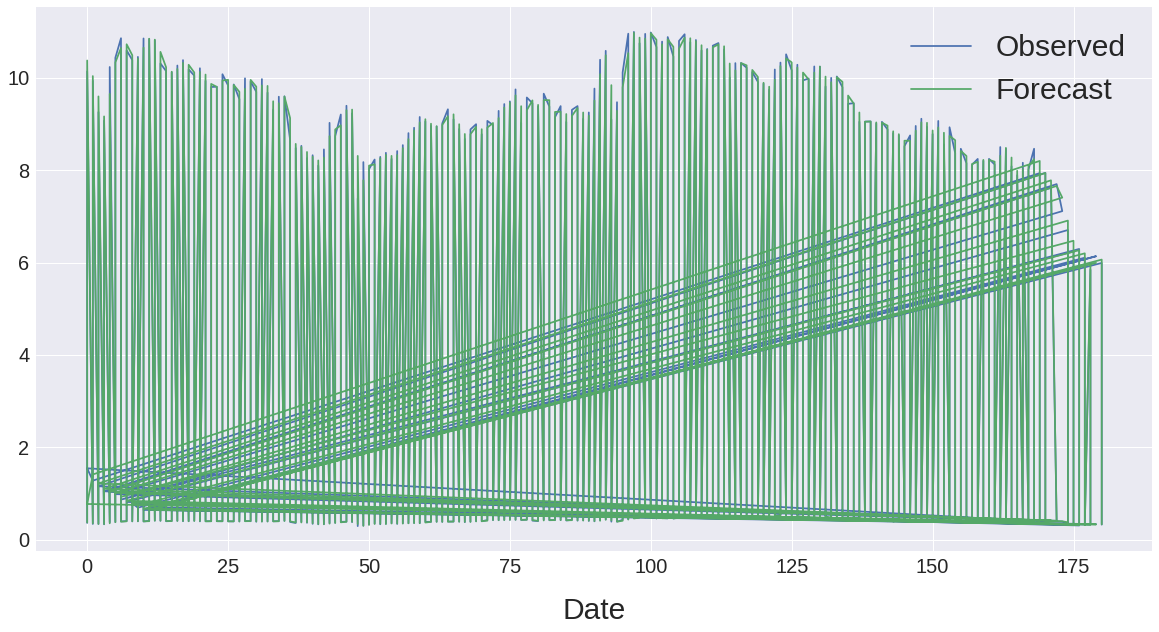

In [125]:
model_SMV()

In [61]:
df.head()

,Item_ID,Datetime,Category_3,Category_2,Category_1,Price_x,Number_Of_Sales_x,Price_y,Number_Of_Sales_y
0,29654,2016-06-17,1,2.0,184,1.545,302.0,0.7725,151.0
1,29654,2016-06-18,1,2.0,184,1.278,348.0,1.4115,325.0
2,29654,2016-06-19,1,2.0,184,1.156,272.0,1.2170,310.0
3,29654,2016-06-20,1,2.0,184,1.047,250.0,1.1015,261.0
4,29654,2016-06-21,1,2.0,184,1.042,284.0,1.0445,267.0


In [0]:
def model_EXMA(win=3, alp=0.9):
    final_predictions = pd.DataFrame()
    for idd in tqdm(ids):
      train = data_train[data_train["Item_ID"] == idd]
      test = data_test[data_test["Item_ID"] == idd]
      da_ta = pd.concat([train, test])
      ma= da_ta.copy()
      ma[["Price", "Number_Of_Sales"]] = da_ta[["Price", "Number_Of_Sales"]].ewm(alpha= alp, min_periods = win).mean()
      y_pred = ma[ma.Datetime > "2015-12-31"]
      test[["Price", "Number_Of_Sales"]] = y_pred[["Price", "Number_Of_Sales"]].values
      tes_og = test_og.copy()
      tes_og = tes_og[tes_og["Item_ID"] == idd]
      final_test = tes_og.merge(test[["Datetime", "Price", "Number_Of_Sales"]], on="Datetime", how = "left")
      if final_test.empty:
        final_predictions = final_test
      else:
        final_predictions = pd.concat([final_predictions, final_test])
    price_rmse = math.pow(mean_squared_error(final_predictions["Price_x"].values, final_predictions["Price_y"].values),0.5)
    volume_rmse = math.pow(mean_squared_error(final_predictions["Number_Of_Sales_x"].values, final_predictions["Number_Of_Sales_y"].values),0.5)
    exma_metrics.append((win, alp, price_rmse, volume_rmse))
    print("\n")
    print("***********")
    print("window = ",win)
    print("alpha = ",alp)
    print("Price RMSE = ",price_rmse)
    print("Volume RMSE = ",volume_rmse)
    print("***********")
    print("\n")
    plt.figure(figsize=(20,10))
    plt.plot(final_predictions['Price_x'], label="Observed")
    plt.plot(final_predictions['Price_y'], label="Forecast")
    plt.legend(prop={'size': 30})  #setting legend size
    plt.xlabel('Date', fontsize=30, labelpad = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)

    plt.figure(figsize=(20,10))
    plt.plot(final_predictions['Number_Of_Sales_x'], label="Observed")
    plt.plot(final_predictions['Number_Of_Sales_y'], label="Forecast")
    plt.legend(prop={'size': 30})  #setting legend size
    plt.xlabel('Date', fontsize=30, labelpad = 20)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

  

In [0]:
def model_NF():
  for id in tqdm(ids):
    train = data_train[data_train["Item_ID"] == id]
    test = data_test[data_test["Item_ID"] == id]
    da_ta = pd.concat([train, test])
    ma= da_ta.copy()
    ma[["Price", "Number_Of_Sales"]] = da_ta[["Price", "Number_Of_Sales"]].shift(1)
    y_pred = ma[ma.Datetime > "2015-12-31"]
    test[["Price", "Number_Of_Sales"]] = y_pred[["Price", "Number_Of_Sales"]].values
    tes_og = test_og.copy()
    tes_og = tes_og[tes_og["Item_ID"] == id]
    final_test = tes_og.merge(test[["Datetime", "Price", "Number_Of_Sales"]], on="Datetime", how = "left")
    if final_test.empty:
      final_predictions = final_test
    else:
      final_predictions = pd.concat([final_predictions, final_test])
  price_rmse = math.pow(mean_squared_error(final_predictions["Price_x"].values, final_predictions["Price_y"].values),0.5)
  volume_rmse = math.pow(mean_squared_error(final_predictions["Number_Of_Sales_x"].values, final_predictions["Number_Of_Sales_y"].values),0.5)
  print("Price RMSE = ",price_rmse)
  print("Volume RMSE = ",volume_rmse)
  plt.figure(figsize=(20,10))
  plt.plot(final_predictions['Price_x'], label="Observed")
  plt.plot(final_predictions['Price_y'], label="Forecast")
  plt.legend(prop={'size': 30})  #setting legend size
  plt.xlabel('Date', fontsize=30, labelpad = 20)
  plt.xticks(fontsize = 20)
  plt.yticks(fontsize = 20)
  
  plt.figure(figsize=(20,10))
  plt.plot(final_predictions['Number_Of_Sales_x'], label="Observed")
  plt.plot(final_predictions['Number_Of_Sales_y'], label="Forecast")
  plt.legend(prop={'size': 30})  #setting legend size
  plt.xlabel('Date', fontsize=30, labelpad = 20)
  plt.xticks(fontsize = 20)
  plt.yticks(fontsize = 20)
  plt.show()

In [0]:
def predict(model):
  if model == "SMA":
    model_SMV(window_size)
  if model == "EXMA":
    model_EXMA(window_size, alpha)
  if model == "NF":
    model_NF()

In [62]:
df.head()

,Item_ID,Datetime,Category_3,Category_2,Category_1,Price_x,Number_Of_Sales_x,Price_y,Number_Of_Sales_y
0,29654,2016-06-17,1,2.0,184,1.545,302.0,0.7725,151.0
1,29654,2016-06-18,1,2.0,184,1.278,348.0,1.4115,325.0
2,29654,2016-06-19,1,2.0,184,1.156,272.0,1.2170,310.0
3,29654,2016-06-20,1,2.0,184,1.047,250.0,1.1015,261.0
4,29654,2016-06-21,1,2.0,184,1.042,284.0,1.0445,267.0


In [0]:
import numpy as np

In [68]:
df.head()

,Item_ID,Datetime,Category_3,Category_2,Category_1,Price_x,Number_Of_Sales_x,Price_y,Number_Of_Sales_y
0,29654,2016-06-17,1,2.0,184,1.545,302.0,0.7725,151.0
1,29654,2016-06-18,1,2.0,184,1.278,348.0,1.4115,325.0
2,29654,2016-06-19,1,2.0,184,1.156,272.0,1.2170,310.0
3,29654,2016-06-20,1,2.0,184,1.047,250.0,1.1015,261.0
4,29654,2016-06-21,1,2.0,184,1.042,284.0,1.0445,267.0


In [0]:
df1 = df.copy()

In [0]:
df1_test = df1[(df1['Datetime'] > '2015-12-31')]

In [75]:
df1.head()

,Item_ID,Datetime,Category_3,Category_2,Category_1,Price_x,Number_Of_Sales_x,Price_y,Number_Of_Sales_y
0,29654,2016-06-17,1,2.0,184,1.545,302.0,0.7725,151.0
1,29654,2016-06-18,1,2.0,184,1.278,348.0,1.4115,325.0
2,29654,2016-06-19,1,2.0,184,1.156,272.0,1.2170,310.0
3,29654,2016-06-20,1,2.0,184,1.047,250.0,1.1015,261.0
4,29654,2016-06-21,1,2.0,184,1.042,284.0,1.0445,267.0


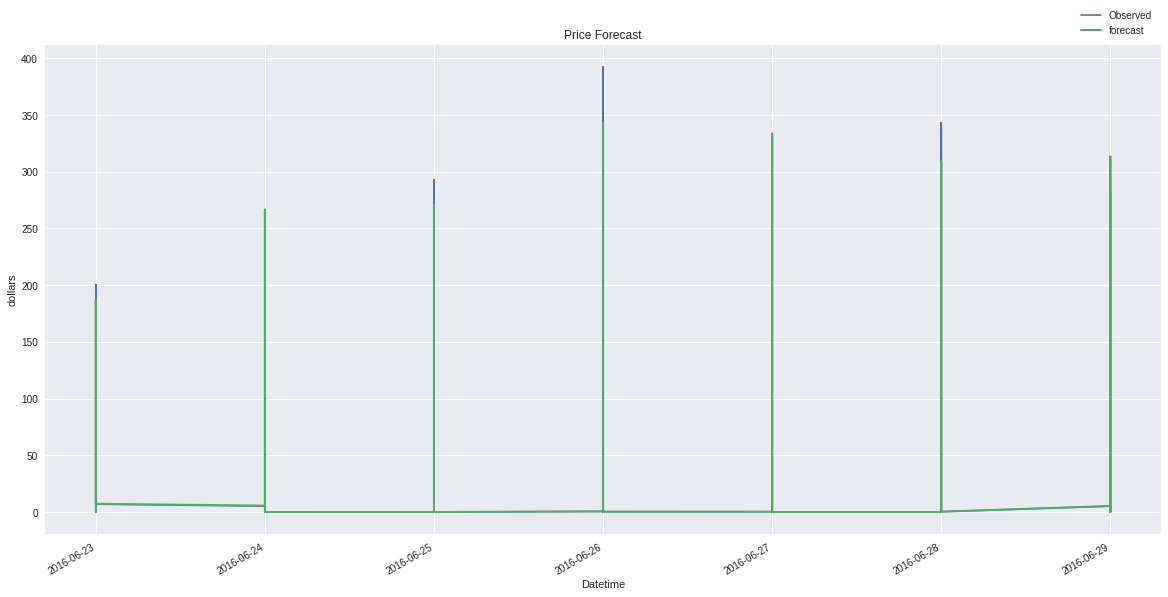

In [95]:
# Dynamic predictions
df1.index = df1.Datetime
df1= df1.sort_values("Datetime")

predict_dy = df1.Price_y

# Graph
fig, ax = plt.subplots(figsize=(20,10))
ax.set(title='Price Forecast', xlabel='Date', ylabel='dollars')


# t_start='2016-06-01'
# pred_start = '2016-06-01'
# t_end='2016-06-29'
ob = df1.Price_x[-10000:]
fc = predict_dy[-10000:]
ob.plot(ax=ax, style='-',linewidth=1.6, label='Observed')
fc.plot(ax=ax,style='-',linewidth=2, label='forecast')
legend = ax.legend(loc='lower right',bbox_to_anchor=(1,1))

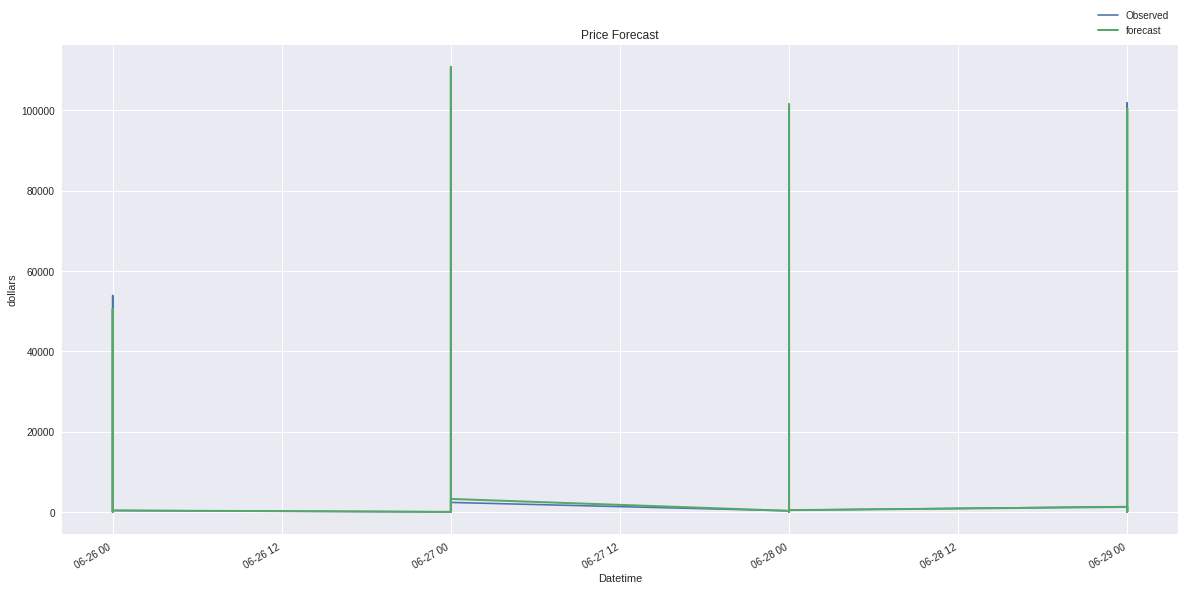

In [105]:
# Dynamic predictions
df1.index = df1.Datetime
df1= df1.sort_values("Datetime")

predict_dy = df1.Number_Of_Sales_y

# Graph
fig, ax = plt.subplots(figsize=(20,10))
ax.set(title='Price Forecast', xlabel='Date', ylabel='dollars')


# t_start='2016-06-01'
# pred_start = '2016-06-01'
# t_end='2016-06-29'
ob = df1.Number_Of_Sales_x[-5000:]
fc = predict_dy[-5000:]
ob.plot(ax=ax, style='-',linewidth=1.6, label='Observed')
fc.plot(ax=ax,style='-',linewidth=2, label='forecast')
legend = ax.legend(loc='lower right',bbox_to_anchor=(1,1))

In [97]:
plt.plot(df1.index, df1["Number_Of_Sales"])

KeyError: ignored

KeyError: ignored

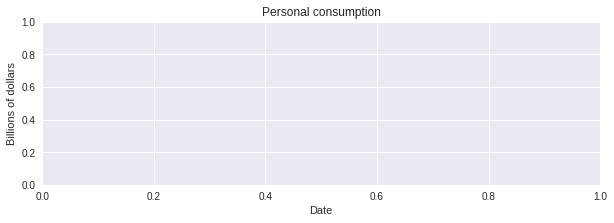

In [70]:
import datetime as datetime
# Dynamic predictions
predict_dy = df["Price_y"]
predict_dy[0] = np.where((predict_dy[0] <= 0) ,0, predict_dy[0])

# Graph
fig, ax = plt.subplots(figsize=(10,3))
ax.set(title='Personal consumption', xlabel='Date', ylabel='Billions of dollars')
t_start=datetime.date(2016,6,17)
pred_start = datetime.date(2016,1,1)
t_end=datetime.date(2016,6,29)
# Plot data points
df.Price_x.ix[t_start:t_end].plot(ax=ax, style='-',linewidth=1.6, label='Observed')
# Plot predictions
predict_dy[t_start:t_end].plot(ax=ax,style='-',linewidth=2, label='forecast')
legend = ax.legend(loc='lower right',bbox_to_anchor=(1,1))

In [100]:
df1.head()

,Item_ID,Datetime,Category_3,Category_2,Category_1,Price_x,Number_Of_Sales_x,Price_y,Number_Of_Sales_y
Datetime,,,,,,,,,
2016-01-01,30405,2016-01-01,1,3.0,41,3.052,32.0,3.0265,31.0
2016-01-01,30395,2016-01-01,1,1.0,383,2.684,266.0,2.6530,252.0
2016-01-01,30415,2016-01-01,0,3.0,387,0.092,6824.0,0.0935,6617.0
2016-01-01,29847,2016-01-01,1,4.0,137,27.864,25.0,28.3595,22.5
2016-01-01,30096,2016-01-01,0,2.0,0,0.453,172.0,0.4580,173.5


ValueError: ignored

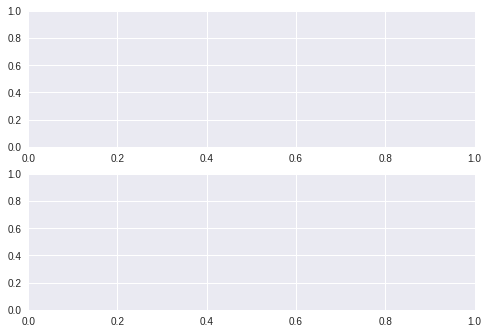

In [101]:

# Fixing random state for reproducibility
np.random.seed(19680801)

t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2

# Two signals with a coherent part at 10Hz and a random part
s1 = df1.Price_x
s2 = df1.Price_y

fig, axs = plt.subplots(2, 1)
axs[0].plot(t, s1, t, s2)
axs[0].set_xlim(0, 2)
axs[0].set_xlabel('time')
axs[0].set_ylabel('s1 and s2')
axs[0].grid(True)

cxy, f = axs[1].cohere(s1, s2, 256, 1. / dt)
axs[1].set_ylabel('coherence')

fig.tight_layout()
plt.show()

In [103]:
df1.head()

,Item_ID,Datetime,Category_3,Category_2,Category_1,Price_x,Number_Of_Sales_x,Price_y,Number_Of_Sales_y
Datetime,,,,,,,,,
2016-01-01,30405,2016-01-01,1,3.0,41,3.052,32.0,3.0265,31.0
2016-01-01,30395,2016-01-01,1,1.0,383,2.684,266.0,2.6530,252.0
2016-01-01,30415,2016-01-01,0,3.0,387,0.092,6824.0,0.0935,6617.0
2016-01-01,29847,2016-01-01,1,4.0,137,27.864,25.0,28.3595,22.5
2016-01-01,30096,2016-01-01,0,2.0,0,0.453,172.0,0.4580,173.5


AttributeError: ignored

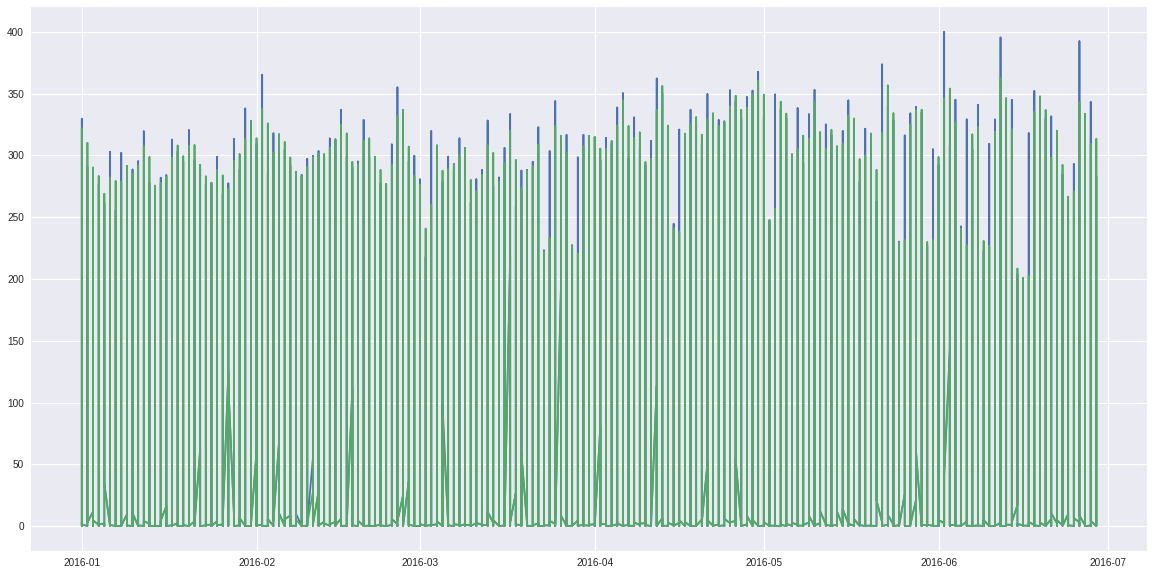

In [109]:
plt.figure(figsize=(20,10))
plt.plot(df1['Price_x'], label="Observed")
plt.plot(df1['Price_y'], label="Forecast")
plt.legend(prop={'size': 30})  #setting legend size
plt.xlabel('Date', fontsize=30, labelpad = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [112]:
df1

,Item_ID,Datetime,Category_3,Category_2,Category_1,Price_x,Number_Of_Sales_x,Price_y,Number_Of_Sales_y
Datetime,,,,,,,,,
2016-01-01,30405,2016-01-01,1,3.0,41,3.052,32.0,3.0265,31.0
2016-01-01,31170,2016-01-01,0,1.0,134,0.294,149.0,0.2915,161.0
2016-01-01,30295,2016-01-01,0,3.0,48,0.121,836.0,0.1230,852.0
2016-01-01,31169,2016-01-01,1,1.0,140,11.889,13.0,12.2885,13.0
2016-01-01,29724,2016-01-01,0,4.0,287,1.196,274.0,1.2205,280.0
2016-01-01,31164,2016-01-01,0,1.0,176,61.390,31.0,59.4075,28.0
2016-01-01,30274,2016-01-01,0,2.0,158,0.067,1724.0,0.0675,1699.0
2016-01-01,30888,2016-01-01,1,2.0,187,1.176,493.0,1.2050,459.0
2016-01-01,29876,2016-01-01,0,2.0,3,1.854,78.0,1.8480,70.5


In [0]:
def plott(df1):
  plt.figure(figsize=(20,10))
  plt.plot(df1['Price_x'], label="Observed" , color='r')
  plt.plot(df1['Price_y'], label="Forecast")
  plt.legend(prop={'size': 30})  #setting legend size
  plt.xlabel('Date', fontsize=30, labelpad = 20)
  plt.xticks(fontsize = 20)
  plt.yticks(fontsize = 20)
  
  plt.figure(figsize=(20,10))
  plt.plot(df1['Number_Of_Sales_x'], label="Observed", color = 'r')
  plt.plot(df1['Number_Of_Sales_y'], label="Forecast")
  plt.legend(prop={'size': 30})  #setting legend size
  plt.xlabel('Date', fontsize=30, labelpad = 20)
  plt.xticks(fontsize = 20)
  plt.yticks(fontsize = 20)
  plt.show()

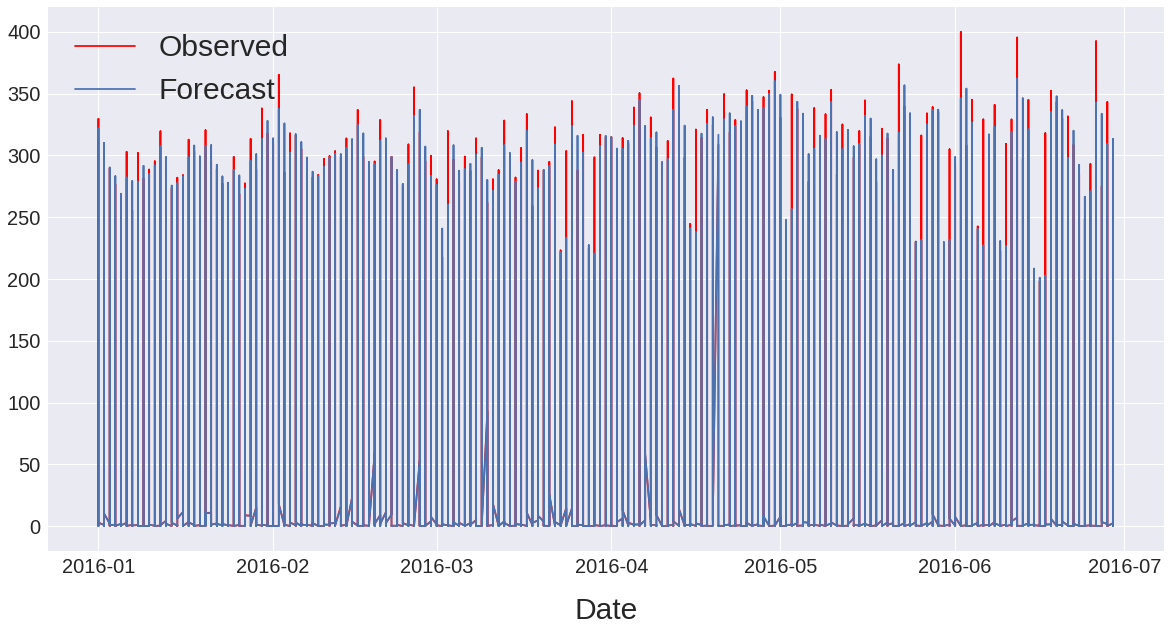

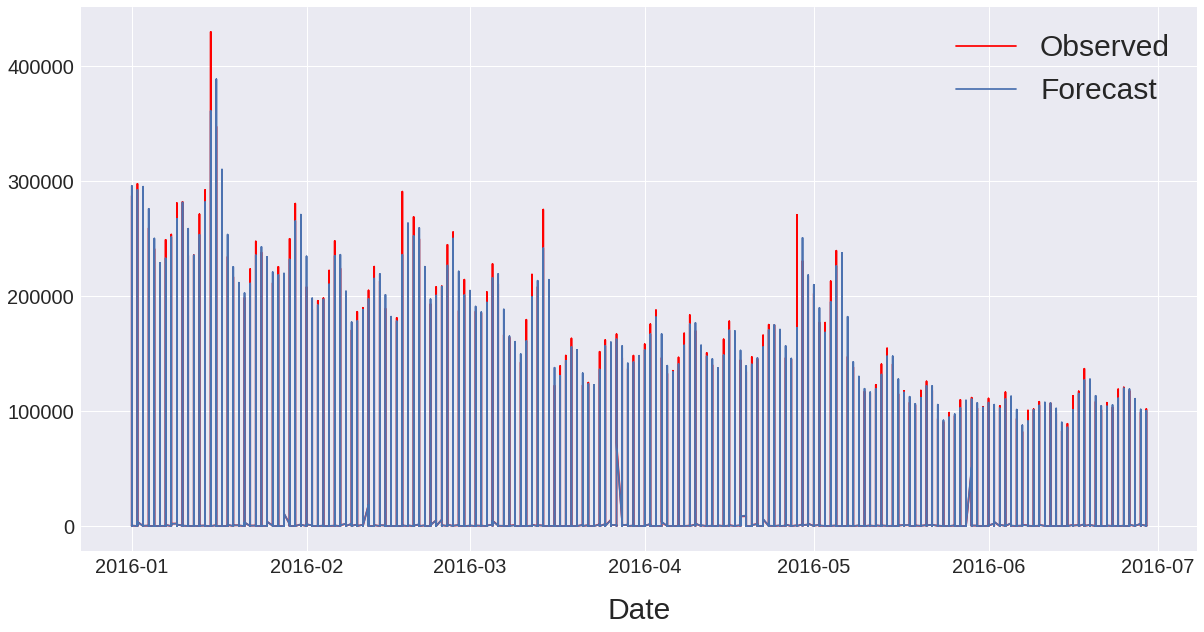

In [138]:
plott(df1)

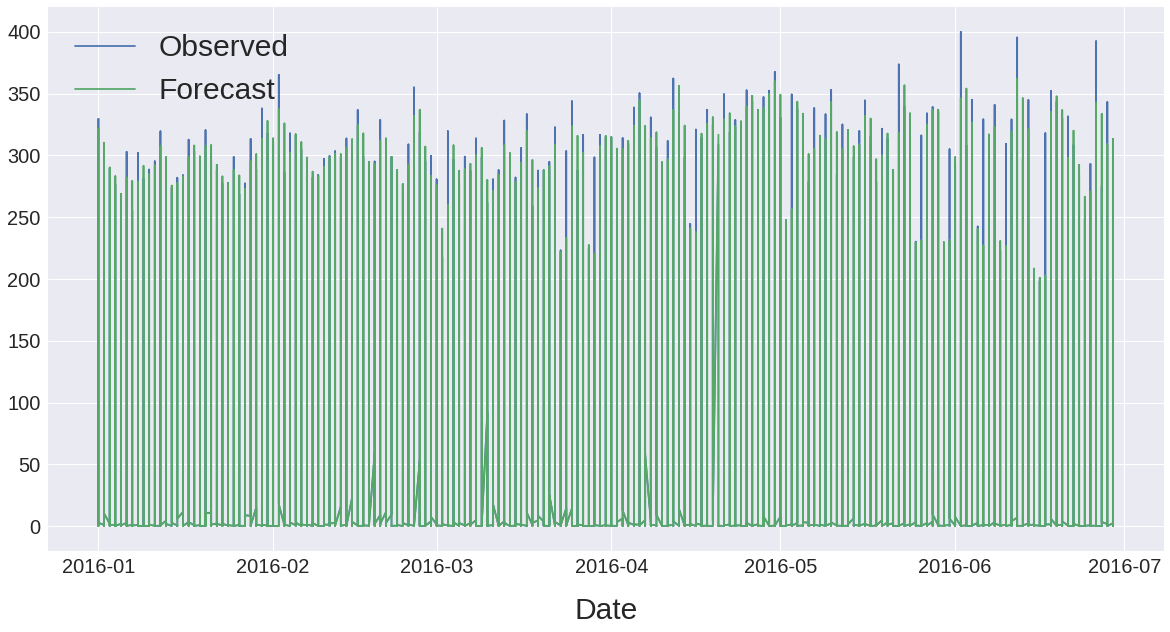

In [126]:
plott(df1)